# FFT from Pendulum Experiment
## Use zero padding to extend data

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
import pandas as pd
import time, csv, os, requests

j = complex(0,1)

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
def GRAB(filename):
    data_grab = []
    dc = np.zeros(Ngrab)
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter=",")   
        for row in reader:
            if row[0][0] != '%': # ignore comments
                for ii in range(Ngrab):
                    dc[ii] = float(row[ii])
                if (len(data_grab) == 0):
                    data_grab = dc
                else:
                    data_grab = np.r_['0,2,1', data_grab, dc]
            else:
                try:
                    print(row[0], end =" ")
                    print(row[1])
                except:
                    print(" ")

    return data_grab

In [3]:
file_name = '/Users/jonathanhow/Documents/GitHub/16_002_Fall_2023/data/data_pdata5.csv'
Ngrab = 3

In [4]:
data = GRAB(file_name)
L1 = np.arange(175,len(data)) # only use some of the data

t = (data[L1,0] - data[L1[0],0])/1e3
x1 = data[L1,1]/4500
x1 -= np.mean(x1)

T = np.mean(np.diff(t))
Fs=1/T
L = len(L1)

print("Loaded local recorded data")

% gopro about 20cm long  
%data=[  
%];  
Loaded local recorded data


In [5]:
n = int(2**np.ceil(np.log2(L)))

X1 = fft(x1,n)
X1_mag = abs(X1)/n
X1_mag_plot = fftshift(X1_mag)
f = fftfreq(n, 1/Fs)
f_plot = fftshift(f)

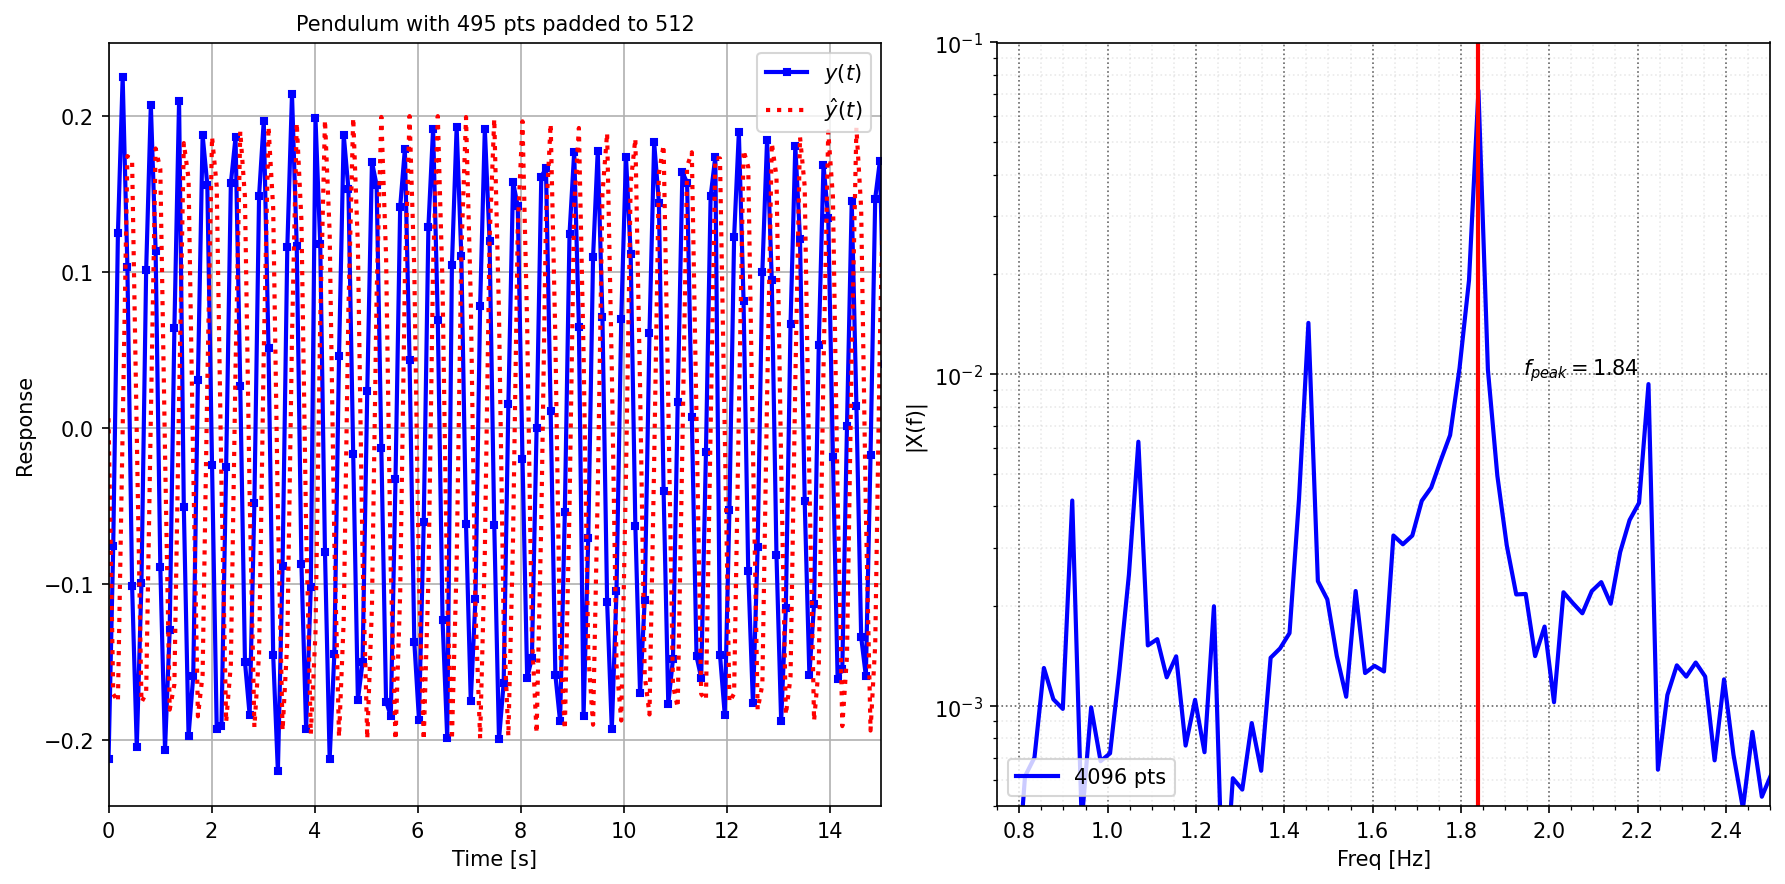

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=150)
ax1.plot(t,x1,'bs-',ms=3,label='$y(t)$')
ax1.plot(t,0.2*np.sin(2*np.pi*t*1.84+.99*np.pi),'r:',label='$\hat y(t)$')
ax1.set_ylabel('Response')
ax1.set_xlabel('Time [s]')
ax1.legend()
ax1.set_title('Pendulum with 495 pts padded to 512')
ax1.set_xlim([0, 15])

f_peak = f[np.argmax(X1_mag)]
ax2.semilogy(f_plot, X1_mag_plot,'b-',label='4096 pts')
ax2.axvline(f_peak,color='r')
ax2.text(f_peak+0.1,.01,'$f_{peak}=$'+str(np.round(f[np.argmax(X1_mag)],2)))
ax2.set_xlim([.75, 2.5])
ax2.set_ylim([5e-4, 0.1])
ax2.legend(loc=3)
ax2.set_xlabel('Freq [Hz]')
ax2.set_ylabel('|X(f)|')
nicegrid()
fig.savefig('./figs/T8_ex10_1.png', dpi=300)
plt.show()